In [1]:
#import library pandas
import pandas as pd
import numpy as np
from collections import defaultdict
import re

In [2]:
#membaca file csv dengan library pandas
data_positif = pd.read_csv('data training positif.csv')
data_negatif = pd.read_csv('data training negatif.csv')

0 = sentiment negatif
1 = sentiment positif

In [3]:
#meng concate data positif dan negatif kedalam satu variable
data = [data_positif,data_negatif]
data_training = pd.concat(data)
data_training.shape
data_training['class'].value_counts()

1    6000
0    6000
Name: class, dtype: int64

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

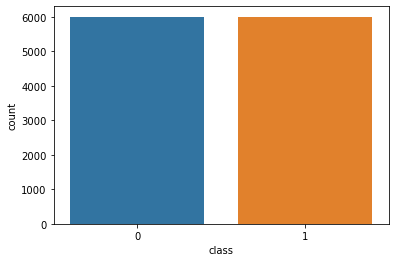

In [5]:
import seaborn as sns
sns.countplot(x='class', data=data_training)

In [6]:
data_training['Text']

0       Bromwell High is a cartoon comedy. It ran at t...
1       I liked the film. Some of the action scenes we...
2       Somewhat funny and well-paced action thriller ...
3       Just two comments....SEVEN years apart? Hardly...
4       Another Aussie masterpiece, this delves into t...
                              ...                        
5995    Having just recently re-viewed "Lipstick" for ...
5996    It's pretty bad when the generic movie synopsi...
5997    I saw 'Descent' last night at the Stockholm Fi...
5998    Some films that you pick up for a pound turn o...
5999    This is one of the dumbest films, I've ever se...
Name: Text, Length: 12000, dtype: object

In [7]:
#mengsplit / memisahkan menjadi per kata
data_training['Text'] = data_training['Text'].apply(lambda x: x.split())

In [8]:
#menggunakan stopword untuk menghilangkan kata-kata yang tidak berpengaruh
stop_list = ['his', 'didn', 'than', 'y', 'both', 'weren', 'from', 'again', 'have', 'having', 'her', 'are', "isn't", 'off', 'where', 'then', 'what', 'most', 'couldn', "wasn't", 'these', 'own', "wouldn't", 'was', 'can', 'a', 'above', 'if', 'haven', 'any', 'm', 'between', 'by', 'our', 'there', 'only', 'wasn', 'same', 'how', "it's", 'after', 'theirs', 'no', 'not', "hadn't", 'more', 'ain', 'few', 'been', 'did', "won't", "should've", "mustn't", 'just', "don't", 'into', "hasn't", 'themselves', 'who', 'you', 'when', 'up', 'yourselves', 'for', 'out', 'doesn', 'against', 'and', 'with', "you've", 'him', 'is', 'needn', 'we', 'under', 'll', 'down', 'mustn', 't', 'ma', 'why', 'yours', 'it', 'but', "that'll", "she's", 'each', 'now', 'i', "needn't", 'had', 'this', 'hadn', 'in', "you'll", 'during', 'its', 'the', 'through', 'to', "you're", 'do', 'too', 'd', 'aren', 'while', "shan't", 'all', 'of', 'being', 'very', 'at', 'because', 'will', "mightn't", 'those', 'doing', 'herself', 'should', 're', 'which', 'am', 'me', 'isn', 'wouldn', 'itself', 'before', 'as', 'does', "aren't", 'whom', 'here', 'shan', 'once', 'about', 'on', "haven't", 'yourself', 'an', 'don', 'he', 'o', 'she', 'further', 'their', 'ours', 'ourselves', 'be', 'below', 'myself', 'were', 'over', 'hasn', 'until', 'my', 'mightn', 'so', 'other', 've', 'that', "couldn't", "weren't", 'or', "didn't", 'nor', 'won', 'has', 's', 'shouldn', 'himself', 'hers', "shouldn't", 'they', 'them', "you'd", 'your', 'some', "doesn't", 'such']
data_training['Text'] = data_training['Text'].apply(lambda x: [item for item in x if item not in stop_list])

In [9]:
data_training['Text']

0       [Bromwell, High, cartoon, comedy., It, ran, ti...
1       [I, liked, film., Some, action, scenes, intere...
2       [Somewhat, funny, well-paced, action, thriller...
3       [Just, two, comments....SEVEN, years, apart?, ...
4       [Another, Aussie, masterpiece,, delves, world,...
                              ...                        
5995    [Having, recently, re-viewed, "Lipstick", firs...
5996    [It's, pretty, bad, generic, movie, synopsis, ...
5997    [I, saw, 'Descent', last, night, Stockholm, Fi...
5998    [Some, films, pick, pound, turn, rather, good,...
5999    [This, one, dumbest, films,, I've, ever, seen....
Name: Text, Length: 12000, dtype: object

In [10]:
#Kata yang sudah di pisahkan digabungkan kembali menjadi satu kesatuan
data_training['Text'] = data_training['Text'].apply(lambda x: ",".join(x))

Kami akan membagi seluruh set data menjadi empat variabel; Train_X(atribut), Test_X(atribut), Train_Y(class), Test_Y(class), dengan rasio 7: 3 (train: test).

In [11]:
from sklearn.model_selection import train_test_split
labels = data_training['class']
text = data_training['Text']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(text,labels,test_size=0.3,random_state=None)

print("Jumlah data train : ", len(Train_X))
print("Jumlah class train : ", len(Train_Y))
print("Jumlah data test : ", len(Test_X))
print("Jumlah class test : ", len(Test_Y))

Jumlah data train :  8400
Jumlah class train :  8400
Jumlah data test :  3600
Jumlah class test :  3600


In [12]:
def preprocessing_text(text):
    
    #untuk menghilangkan angka, karakter dan hanya menyisakan huruf saja
    text_bersih=re.sub('[^a-z\s]+',' ',text,flags=re.IGNORECASE) 
    #untuk menghilangkan simbol break <br>
    text_bersih=re.sub("(<br\s*/><br\s*/>)|(\-)|(\/)"," ",text_bersih)
    #menghilangkan multiple space
    text_bersih=re.sub('(\s+)',' ',text_bersih)
    #meng konvert semua kata menjadi lower case
    text_bersih=text_bersih.lower()
    
    return text_bersih

# Rumus Naive Bayes

![title](naive-bayes-formula-1-1.jpg)

x : Data dengan class yang belum diketahui
c : Hipotesis data merupakan suatu class spesifik
P(c|x) : Probabilitas hipotesis berdasar kondisi (posteriori probability)
P(c) : Probabilitas hipotesis (prior probability)
P(x|c) : Probabilitas berdasarkan kondisi pada hipotesis
P(x) : Probabilitas c

Penggunaan Naive Bayes Pada Text Sentiment Analysis
![title](hemeh.png)

In [13]:
class NaiveBayes:
    
    def __init__(self,unique_classes):
        
        self.classes=unique_classes #menyimpang unique class        

    def BagOfWord(self,kata,index): #bertujuan untuk melakukan tokenized dan juga bag of word
        
        if isinstance(kata,np.ndarray): 
            kata=kata[0]
     
        for token_kata in kata.split(): #split seluruh kata
          
            self.bow_dicts[index][token_kata]+=1 #tambah satu ketika setiap kata yang sama pada dictionary
            
    def training_text(self,data_text,label_class): #untuk training dan juga melakukan processing model Naive Bayes
    
        self.examples=data_text #inisiasi untuk data text
        self.labels=label_class #inisiasi untuk class
        self.bow_dicts=np.array([defaultdict(lambda:0) for index in range(self.classes.shape[0])]) #membuat array sesuai dengan jumlah kelas
        
        #mengambil data bertipe data numpy arrays
        
        if not isinstance(self.examples,np.ndarray): 
            self.examples=np.array(self.examples)
        if not isinstance(self.labels,np.ndarray): 
            self.labels=np.array(self.labels)
            
        #melakukan bag of word untuk setiap kelasnya
        for index_kelas,kelas in enumerate(self.classes):
          
            text_kelas=self.examples[self.labels==kelas] #membagikan dokumen sesuai dengan kelas           
           
            #melakukan prepocessing data train
            text_clean=[preprocessing_text(text) for text in text_kelas]
            text_clean=pd.DataFrame(data=text_clean)
            #melakukan bag of word untuk data train sesuai dengan kelasnya
            np.apply_along_axis(self.BagOfWord,1,text_clean,index_kelas)
            
                

        probab_kelas=np.zeros(self.classes.shape[0]) #membuat wadah untuk menyimpan hasil probabilitas untuk setiap kelasnya
        seluruh_kata=[] #membuat list yang nanti akan diisikan kata kata sesuai dengan kelasnya
        jumlah_kata=np.zeros(self.classes.shape[0]) #membuat array untuk menyimpan hasil perhitungan total kata tiap kelas
        for index_kelas,kelas in enumerate(self.classes):
           
            #melakukan perhitungan untuk nilai prior probability p(c) untuk setiap kelasnya
            probab_kelas[index_kelas]=np.sum(self.labels==kelas)/float(self.labels.shape[0]) 
            
            #untuk menghitung semua kata pada setiap kelasnya
            count=list(self.bow_dicts[index_kelas].values())
            jumlah_kata[index_kelas]=np.sum(np.array(count))+1 # |v| is remaining to be added
            
            #menggabungkan semua kata dari setiap kelas                          
            seluruh_kata+=self.bow_dicts[index_kelas].keys()
                                                     
    
        #membuat sebuah vocabulary berisikan kata kata unique dari setiap kelasnya.
        self.vocab=np.unique(np.array(seluruh_kata))
        self.vocab_length=self.vocab.shape[0]
                                  
        #untuk mencari nilai pembagi dari rumus naive bayes                           
        pembagi=np.array([jumlah_kata[index_kelas]+self.vocab_length+1 for kelas_index,kelas in enumerate(self.classes)])                                                                          
        self.kelas_info=[(self.bow_dicts[kelas_index],probab_kelas[kelas_index],pembagi[kelas_index]) for kelas_index,kelas in enumerate(self.classes)]                               
        self.kelas_info=np.array(self.kelas_info)                                 
                                              
                                              
    def ProbabilitasDataTesting(self,data_test):                                                 
                                              
        likelihood_prob=np.zeros(self.classes.shape[0]) #membuat sebuah tempat untuk menyimpan nilai likelihood
        
        #mencari nilai probabilitas untuk setiap data test 
        for kelas_index,kelas in enumerate(self.classes): 
                             
            for test_text in data_test.split(): #di split tiap kata di data test nya                          
                
                #menghitung jumlah kata pada data testing                          
                test_token_counts=self.kelas_info[kelas_index][0].get(test_text,0)+1
                
                #menghitung nilai likelihood untuk data testing                              
                test_token_prob=test_token_counts/float(self.kelas_info[kelas_index][2])                              
                likelihood_prob[kelas_index]+=np.log(test_token_prob)
                                              
        # mencari nilai posterior probility
        post_prob=np.empty(self.classes.shape[0])
        for kelas_index,kelas in enumerate(self.classes):
            post_prob[kelas_index]=likelihood_prob[kelas_index]+np.log(self.kelas_info[kelas_index][1])                                  
      
        return post_prob
    
   
    def test(self,data_testing):
      
        hasil_prediksi=[] #menyimpan untuk hasil prediksi pada setiap data testing
        for text in data_testing: 
                                              
            #melakukan prepocessing pada data testing                                 
            text_clean=preprocessing_text(text) 
             
            #untuk mendapatkan nilai posterior probability pada setiap data testing untuk setiap kelasnya                               
            post_prob=self.ProbabilitasDataTesting(text_clean)
            
            #lalu cari nilai maximum dari nilai posterior probability dari setiap kelasnya
            hasil_prediksi.append(self.classes[np.argmax(post_prob)])
                
        return np.array(hasil_prediksi) 

In [14]:
nb=NaiveBayes(np.unique(Train_Y)) #melakukan proses unique pada label train
nb.training_text(Train_X,Train_Y) #melakukan proses training pada data training

In [19]:
#untuk menghasilkan nilai prediksi dari data test
pclasses=nb.test(Test_X)
nilai_akurasi=(np.sum(pclasses==Test_Y)/float(Test_Y.shape[0]) * 100)
print ("Nilai akurasi data Test: {:2f} %".format(nilai_akurasi))

Nilai akurasi data Test: 86.194444 %
